# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index. 

In this notebook we employed the **Silhouette score**. This metriccomputes how similar a sample is to its own cluster compared to other clusters. Its interval is [-1,1], where higher values indicate an appropriate configuration of the clusters.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
import numpy as np
import sklearn
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [3]:
X = r.readWord2Vec()
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
[[ 0.02987077 -0.15110606 -0.02884087 ...,  0.02446168 -0.08834651
  -0.09221231]
 [ 0.05298314 -0.05420527  0.02592565 ...,  0.01782615 -0.02950471
   0.00508323]
 [ 0.07016749 -0.05757345 -0.13483836 ...,  0.10909334 -0.0250241
  -0.0654501 ]
 ..., 
 [ 0.10532002 -0.05241808 -0.02433    ..., -0.01405231  0.03333547
   0.01318201]
 [ 0.10429937 -0.1797766  -0.05073992 ...,  0.01325834 -0.18105656
  -0.07903843]
 [ 0.13153867 -0.05729359 -0.04480435 ..., -0.00396843 -0.05132721
   0.00955163]]
(13229, 128)


In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_jobs=-1,n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Silhouette Method --- K-means
This methods aims to define the best number of clusters (K) by the silhouette score.

In [6]:
silhouette = 0
Ks = []
Ss = []
Epsilon = 0.1
it = 1
J = 0.

k = 2
print("###############################")
while (silhouette < Epsilon):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_jobs=-1,n_clusters=k,random_state=42)
    cluster_result = cluster.fit(X)
    print("Finished")    
    silhouette = silhouette_score(X,cluster_result.labels_)
    Ss.append(silhouette)
    print("avg silhouette of", silhouette)    
    Ks.append(k)
    k += 100
    it += 1
    print("###############################")
    
best_K = k-100
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
avg silhouette of 0.0374535850286
###############################
Number of Clusters: 102
Starting K-means++
Finished
avg silhouette of 0.00739169150097
###############################
Number of Clusters: 202
Starting K-means++
Finished
avg silhouette of 0.0144750868184
###############################
Number of Clusters: 302
Starting K-means++
Finished
avg silhouette of 0.0190881748247
###############################
Number of Clusters: 402
Starting K-means++
Finished
avg silhouette of 0.0243346191202
###############################
Number of Clusters: 502
Starting K-means++
Finished
avg silhouette of 0.0268698014845
###############################
Number of Clusters: 602
Starting K-means++
Finished
avg silhouette of 0.0281363018242
###############################
Number of Clusters: 702
Starting K-means++
Finished
avg silhouette of 0.0306771940394
###############################
Number of Clusters: 802
S

In [7]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 4502
Applying K-means
Finished
#############################


In [8]:
true_label = best_cluster_result.labels_

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

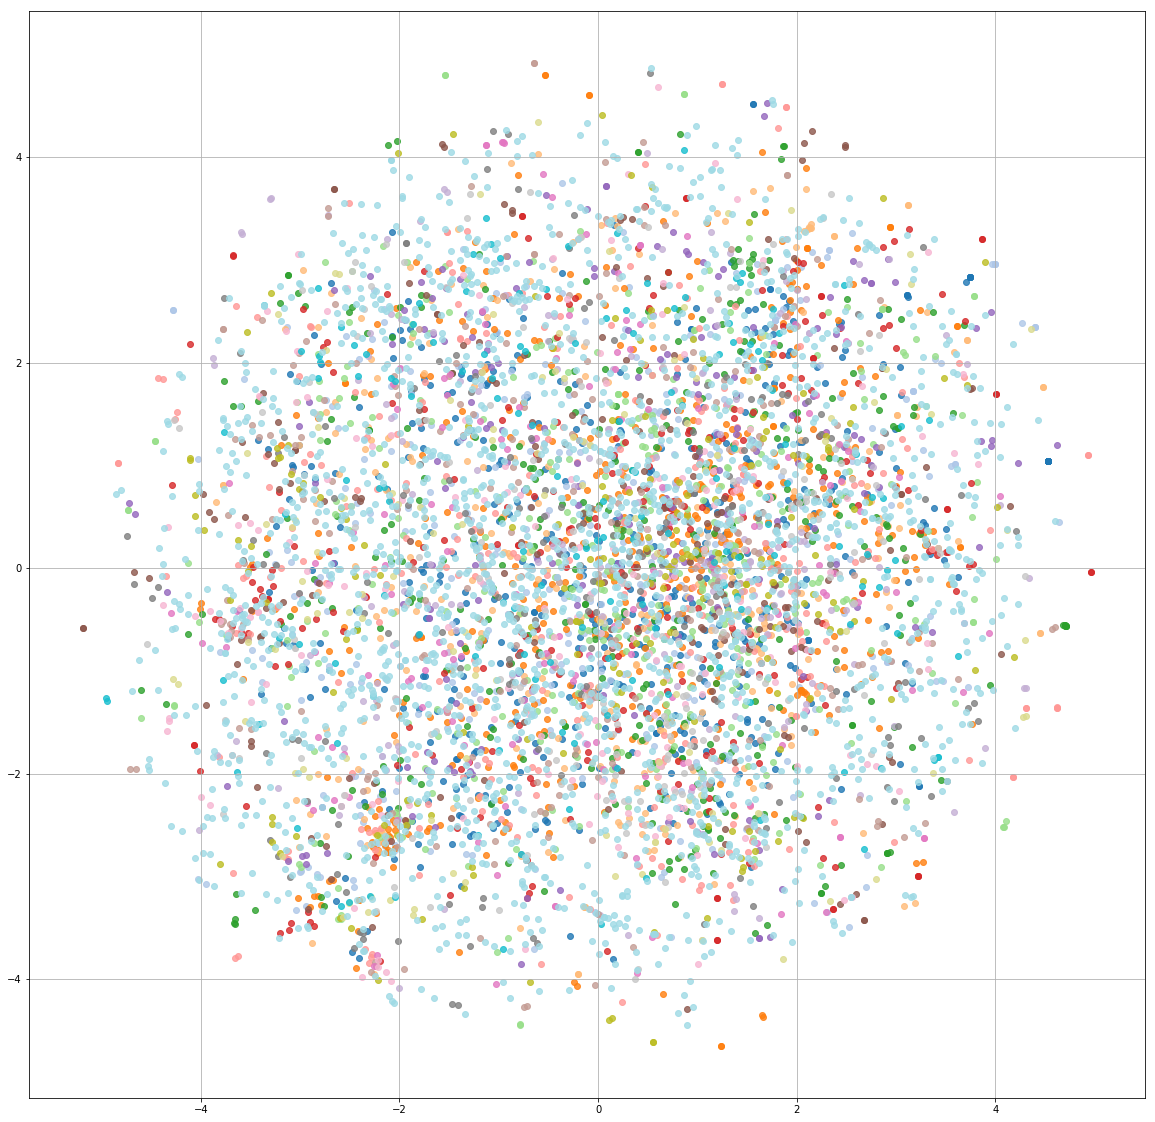

In [9]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])